# Assignment 2a
## Exploratory Data Analysis, Data Cleaning, Feature Engineering, PCA, Hyperparameter Optimization, and Multilayer Perceptron Feed-forward Neural Networks
### BIDA 407 | 202305 D01
### Rico Flores

### Instructions

For the second notebook use of "inp_alfalfa.npy" and "tar_alfalfa.npy" as the input and target, respectively.

Implement an ANN classifier model from SKlearn: 

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


Employ a three-layer ANN structure (50, 30, 20) for binary classification. Your mission is to identify the most suitable hyperparameters that yield superior model performance, using the classification metrics provided in my notebooks as evaluation measures. Support your assertions by providing three distinct examples of hyperparameters.

Please note: Adequately explaining your plots and findings in the notebooks is crucial. A plain Jupyter notebook without any explanatory text would not suffice.

Dataset:
https://drive.google.com/drive/folders/1YUQexDHOP_qFrOxUKs3KgIx-8CLvIiU0?usp=share_linkhttps://drive.google.com/drive/folders/1YUQexDHOP_qFrOxUKs3KgIx-8CLvIiU0?usp=share_link

## Part 1 - EDA

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Shape and Head

In [3]:
input_data = np.load('inp_alfalfa.npy')
target_data = np.load('tar_alfalfa.npy')

print("Input data shape:", input_data.shape)
print("Target data shape:", target_data.shape)

Input data shape: (13674, 15)
Target data shape: (13674,)


In [4]:
# Show the first three rows of the input array
print("First three rows of the input array:")
print(input_data[:3, :])

# Show the first three rows of the target array
print("First three rows of the target array:")
print(target_data[:3])

First three rows of the input array:
[[  8.6744 -16.9118 -18.0226 -18.2436 -18.22   -18.1338   0.2676   7.2104
   -1.1417  12.5286   0.2638   2.153    0.       1.282   -9.8161]
 [  9.6099 -17.8492 -18.3277 -18.7489 -18.9166 -19.03     0.3535   7.4104
   -0.6952  11.5755   0.1502   5.122    0.194    3.469  -10.3051]
 [  8.0287 -15.8953 -16.7127 -16.8721 -16.9318 -17.0034   0.1882   7.2919
   -0.911   12.208   -0.4624   0.932    0.       0.555   -8.9397]]
First three rows of the target array:
[1. 1. 1.]


### Descriptive Statistics

In [5]:
input_mean = np.mean(input_data)
input_std = np.std(input_data)
input_min = np.min(input_data)
input_max = np.max(input_data)
input_q1 = np.percentile(input_data, 25)
input_q3 = np.percentile(input_data, 75)

target_mean = np.mean(target_data)
target_std = np.std(target_data)
target_min = np.min(target_data)
target_max = np.max(target_data)
target_q1 = np.percentile(target_data, 25)
target_q3 = np.percentile(target_data, 75)

print("Input data statistics:")
print("Mean:", input_mean)
print("Standard Deviation:", input_std)
print("Minimum:", input_min)
print("Maximum:", input_max)
print("25th Percentile (Q1):", input_q1)
print("75th Percentile (Q3):", input_q3)

print("\nTarget data statistics:")
print("Mean:", target_mean)
print("Standard Deviation:", target_std)
print("Minimum:", target_min)
print("Maximum:", target_max)
print("25th Percentile (Q1):", target_q1)
print("75th Percentile (Q3):", target_q3)

Input data statistics:
Mean: -4.653308309199941
Standard Deviation: 11.577877327929192
Minimum: -23.411
Maximum: 25.65
25th Percentile (Q1): -18.4212
75th Percentile (Q3): 3.691

Target data statistics:
Mean: 0.5
Standard Deviation: 0.5
Minimum: 0.0
Maximum: 1.0
25th Percentile (Q1): 0.0
75th Percentile (Q3): 1.0


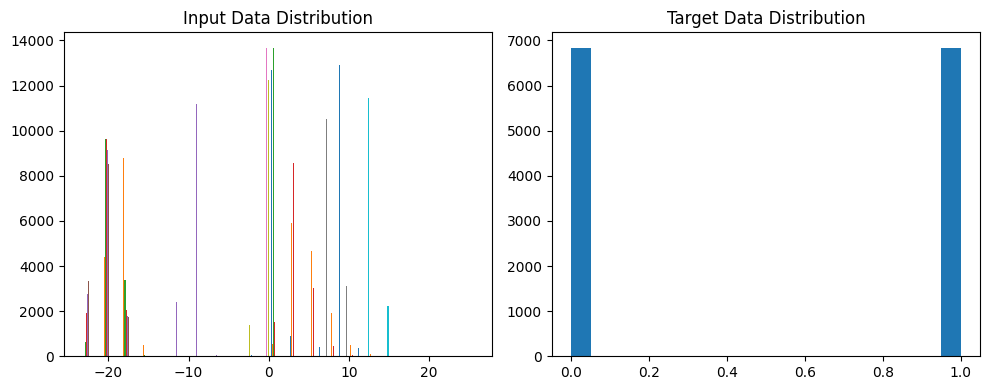

In [6]:
# Create histograms using Matplotlib
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(input_data, bins=20)
plt.title("Input Data Distribution")

plt.subplot(1, 2, 2)
plt.hist(target_data, bins=20)
plt.title("Target Data Distribution")

plt.tight_layout()
plt.show()

In [7]:
# Get unique values in the target array
unique_values = np.unique(target_data)

# Print the unique values
print("Unique values in the target array:")
print(unique_values)

Unique values in the target array:
[0. 1.]


In [8]:
# Load the datasets
input_data = np.load('inp_alfalfa.npy')
target_data = np.load('tar_alfalfa.npy')

# Check for NaN values in the input dataset
input_has_nan = np.isnan(input_data)
input_nan_indices = np.where(input_has_nan)[0]
input_nan_count = np.count_nonzero(input_has_nan)
input_has_any_nan = np.any(input_has_nan)

# Check for NaN values in the target dataset
target_has_nan = np.isnan(target_data)
target_nan_indices = np.where(target_has_nan)[0]
target_nan_count = np.count_nonzero(target_has_nan)
target_has_any_nan = np.any(target_has_nan)

# Print the results
print("Input dataset:")
print("Indices of NaN values:", input_nan_indices)
print("Count of NaN values:", input_nan_count)
print("Any NaN values:", input_has_any_nan)

print("\nTarget dataset:")
print("Indices of NaN values:", target_nan_indices)
print("Count of NaN values:", target_nan_count)
print("Any NaN values:", target_has_any_nan)

Input dataset:
Indices of NaN values: []
Count of NaN values: 0
Any NaN values: False

Target dataset:
Indices of NaN values: []
Count of NaN values: 0
Any NaN values: False


Looks like data is clean and good to go.

### Summary and Problem

From our EDA, we see that we have a clean 13674 by 16 (including target) dimensions dataset and our goal is to solve a binary classification problem.

We'll be using the input features from inp_alfalfa.npy to train the model. The corresponding target labels from tar_alfalfa.npy will be used to train and evaluate the model's performance.

We'll also ensure that the input features are properly normalized or standardized to account for variations in scales and distributions.

Then we'll do dimensionality reduction through PCA to improve our training efficiency and performance.Then we'll train an the model for binary classification. 

Once the model is trained, we'll evaluate its performance using appropriate evaluation metrics such as accuracy, precision, recall, or F1-score. This will help me assess how well the model is able to classify new, unseen samples.

## Part 2 - PCA

### Normalize

In [9]:
# Normalize the input data
scaler = StandardScaler()
input_data_normalized = scaler.fit_transform(input_data)

### Evaluating N Components

In [10]:
# Create a PCA object with the desired number of components
n_components = 5  # number of components you want to keep
pca = PCA(n_components=n_components)

# Fit the PCA model to the input data and transform it
input_pca = pca.fit_transform(input_data)

# Print the explained variance ratio of the selected components
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

# Print the transformed data
print("Transformed data:")
print(input_pca)

Explained variance ratio: [0.58901258 0.2594255  0.07554209 0.03824146 0.01087786]
Transformed data:
[[-4.22997439  0.95215734  0.36350077  0.56542446 -0.01456996]
 [-0.40988077  2.21152249  0.10500844 -0.44268441  0.45273365]
 [-7.20822567  2.06202109 -0.05389419  0.54320881 -0.48818217]
 ...
 [-1.19990444 -0.4318294   1.49033351 -0.53785702 -0.84561628]
 [ 0.91467685  0.806215   -0.30204433  0.25905277  0.76030874]
 [-4.10506159  0.47074724  2.41045094 -0.04439725  0.16366206]]


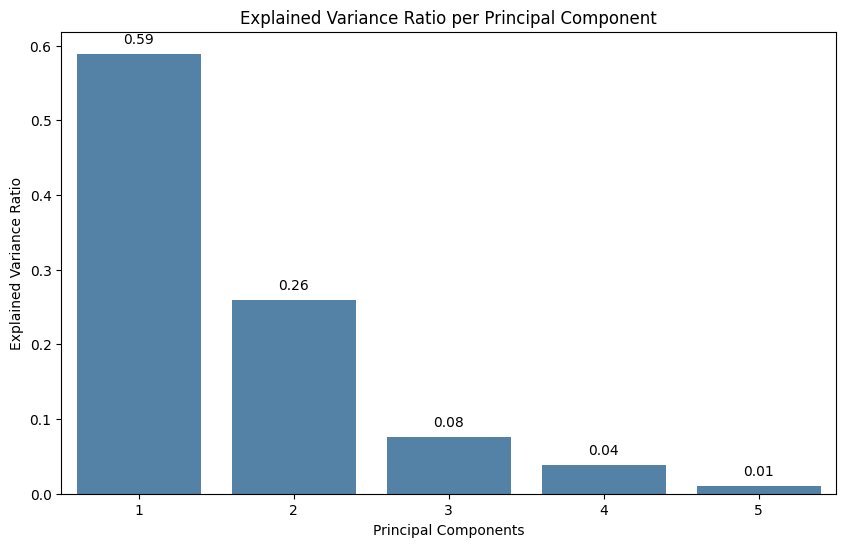

In [11]:
# Scree plot with individual contributions
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(1, n_components + 1), y=explained_variance_ratio, color='steelblue')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')

# Add labels for individual contributions
for i, ratio in enumerate(explained_variance_ratio):
    plt.text(i, ratio + 0.01, f'{ratio:.2f}', color='black', ha='center', va='bottom')

plt.show()

3 must be enough, so we'll proceed to using only 3 PCs.

In [12]:
# Create a PCA object with the desired number of components
n_components = 3  # number of components you want to keep
pca = PCA(n_components=n_components)

# Fit the PCA model to the input data and transform it
input_pca = pca.fit_transform(input_data)

# Print the explained variance ratio of the selected components
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

# Print the transformed data
print("Transformed data:")
print(input_pca)

Explained variance ratio: [0.58901258 0.2594255  0.07554209]
Transformed data:
[[-4.22997439  0.95215734  0.36350077]
 [-0.40988077  2.21152249  0.10500844]
 [-7.20822567  2.06202109 -0.05389419]
 ...
 [-1.19990444 -0.4318294   1.49033351]
 [ 0.91467685  0.806215   -0.30204433]
 [-4.10506159  0.47074724  2.41045094]]


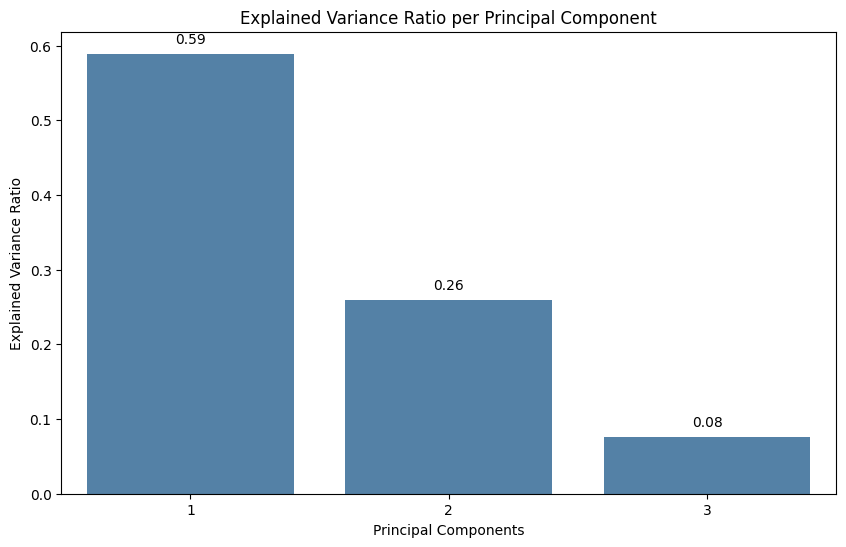

In [13]:
# Scree plot with individual contributions
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(1, n_components + 1), y=explained_variance_ratio, color='steelblue')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')

# Add labels for individual contributions
for i, ratio in enumerate(explained_variance_ratio):
    plt.text(i, ratio + 0.01, f'{ratio:.2f}', color='black', ha='center', va='bottom')

plt.show()

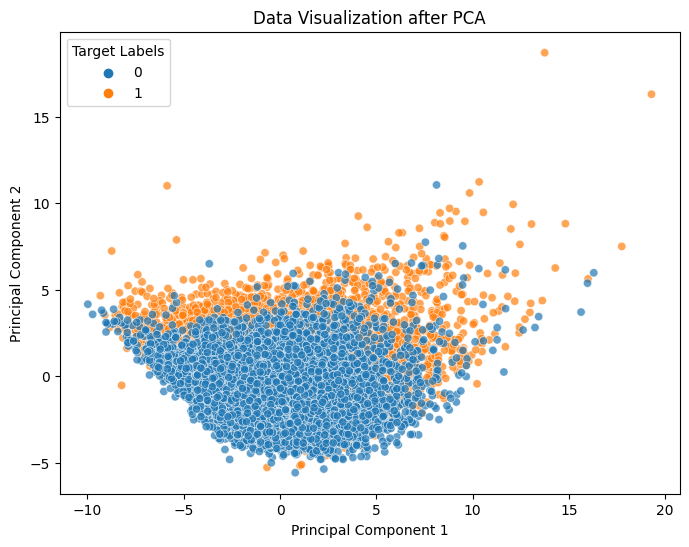

In [14]:
# Create a scatter plot of the principal components with color-coded target data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=input_pca[:, 0], y=input_pca[:, 1], hue=target_data, alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Visualization after PCA')
plt.legend(title='Target Labels', loc='best')
plt.gca().legend_.set_title('Target Labels')
plt.gca().legend_.get_texts()[0].set_text('0')
plt.gca().legend_.get_texts()[1].set_text('1')
plt.show()

## Part 3 - Data Modeling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

### Splitting the Data

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2, random_state=42)

### Manual Optimization

**Training Plan:**

| Hyperparameter      | Trial 1           | Trial 2           | Trial 3           |
|---------------------|-------------------|-------------------|-------------------|
| Learning Rate       | 0.01              | 0.001             | 0.0001            |
| Number of Hidden Layers | 3               | 3                 | 3                 |
| Number of Units per Hidden Layer | (50,30,20)    | (50,30,20)                | (50,30,20)                |
| Activation Function | ReLU              | ReLU           | ReLU              |
| Batch Size          | Auto                | Auto                | Auto               |
| Regularization      | L2 regularization | L2 regularization     | L2 regularization |
| Number of Epochs    | 500                | 500               | 500                |
| Optimizer           | Adam              | Adam               | Adam           |


#### Training on varying Learning Rates

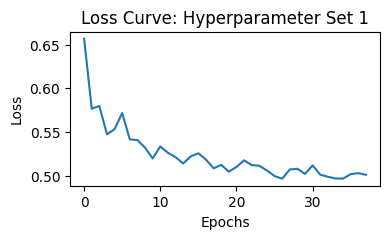

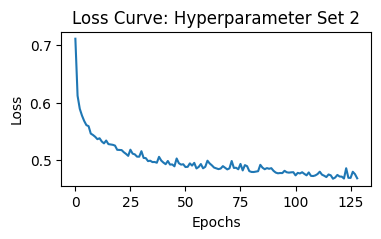

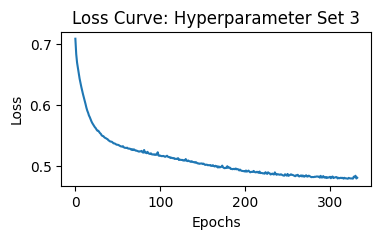

In [17]:
# Define the hyperparameters to loop through
learning_rates = [0.01, 0.001, 0.0001]
hidden_layers = [3, 3, 3]
units_per_layer = [50, 30, 20]
activation_functions = ['relu', 'relu', 'relu']
optimizers = ['adam', 'adam', 'adam']
num_epochs = [500, 500, 500]

# Uncomment when trying batch size
# batch_sizes = [32, 64, 128]

# Loop through the hyperparameters
for i in range(len(learning_rates)):
  
    # Create an MLPClassifier with the current hyperparameters
    model = MLPClassifier(
        hidden_layer_sizes=tuple(units_per_layer[:hidden_layers[i]]),
        activation=activation_functions[i],
        learning_rate_init=learning_rates[i],
        solver=optimizers[i],
        max_iter=num_epochs[i]
        
        # Uncomment below when trying batch size
        # batch_size=batch_sizes[i]
    )
    
    # Train the model and get the training history
    history = model.fit(X_train, y_train)
    
    # Plot the loss curve
    plt.figure(figsize=(4, 2))
    plt.plot(history.loss_curve_)
    plt.title(f'Loss Curve: Hyperparameter Set {i+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

Observation:

Learning rate is a tradeoff between speed of convergence and fluctuation. Smaller learning rates are slow to converge but doesn't fluctuate too much on the other side relatively larger learning rates are fast to converge but fluctuates a lot.

#### Training on varying Batch Sizes

| Hyperparameter      | Trial 1           | Trial 2           | Trial 3           |
|---------------------|-------------------|-------------------|-------------------|
| Learning Rate       | 0.01              | 0.01             | 0.01            |
| Number of Hidden Layers | 3               | 3                 | 3                 |
| Number of Units per Hidden Layer | (50,30,20)    | (50,30,20)                | (50,30,20)                |
| Activation Function | ReLU              | ReLU           | ReLU              |
| Batch Size          | 32                | 64                | 128               |
| Regularization      | L2 regularization | L2 regularization     | L2 regularization |
| Number of Epochs    | 500                | 500               | 500                |
| Optimizer           | Adam              | Adam               | Adam           |


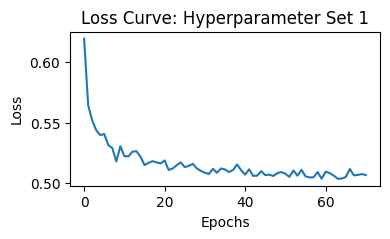

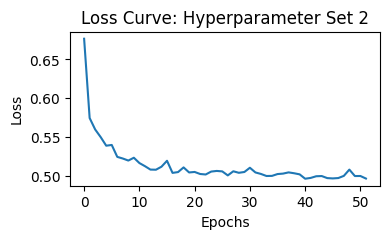

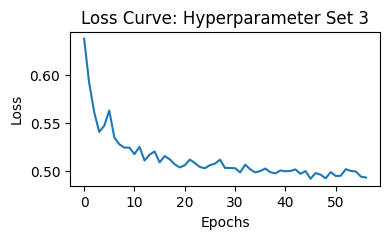

In [18]:
# Define the hyperparameters to loop through
learning_rates = [0.01, 0.01, 0.01]
hidden_layers = [3, 3, 3]
units_per_layer = [50, 30, 20]
activation_functions = ['relu', 'relu', 'relu']
optimizers = ['adam', 'adam', 'adam']
num_epochs = [500, 500, 500]
batch_sizes = [32, 64, 128]

# Loop through the hyperparameters
for i in range(len(learning_rates)):
  
    # Create an MLPClassifier with the current hyperparameters
    model = MLPClassifier(
        hidden_layer_sizes=tuple(units_per_layer[:hidden_layers[i]]),
        activation=activation_functions[i],
        learning_rate_init=learning_rates[i],
        solver=optimizers[i],
        max_iter=num_epochs[i],
        batch_size=batch_sizes[i]
    )
    
    # Train the model and get the training history
    history = model.fit(X_train, y_train)
    
    # Plot the loss curve
    plt.figure(figsize=(4, 2))
    plt.plot(history.loss_curve_)
    plt.title(f'Loss Curve: Hyperparameter Set {i+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

From my observation, relatively larger batch sizes converges smoother compared to smaller. You may try to change the values and rerun the cells over and over to find better hyperparameters.

#### Final Model

In [32]:
# Create an MLPClassifier with three hidden layers
model = MLPClassifier(hidden_layer_sizes=(50, 30, 20), learning_rate_init=0.001,alpha=0.0001, activation='relu', max_iter=10000, random_state=42)

In [ ]:
# Train the model and get the training history
history = model.fit(X_train, y_train)

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(history.loss_curve_)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#### Evaluation Metrics

In [30]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7561243144424131
